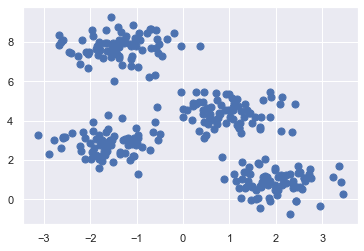

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
X,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [4]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)


In [12]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X,n_clusters,rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]

    while True:
        labels=pairwise_distances_argmin(X,centers)
        new_centers=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers=new_centers
    return centers,labels


    

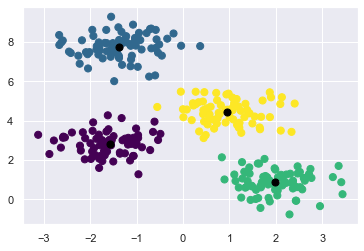

In [16]:
centers, lebels=find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=50,cmap='viridis')

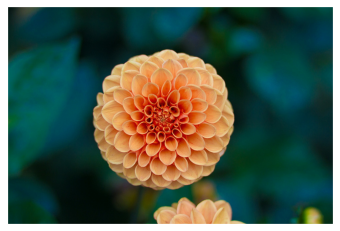

In [17]:
from sklearn.datasets import load_sample_image
china=load_sample_image("flower.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [19]:
china.shape #3 indicates colors

(427, 640, 3)

In [20]:
data=china/255
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [24]:
def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[1].scatter(R,B,color=colors,marker='.')


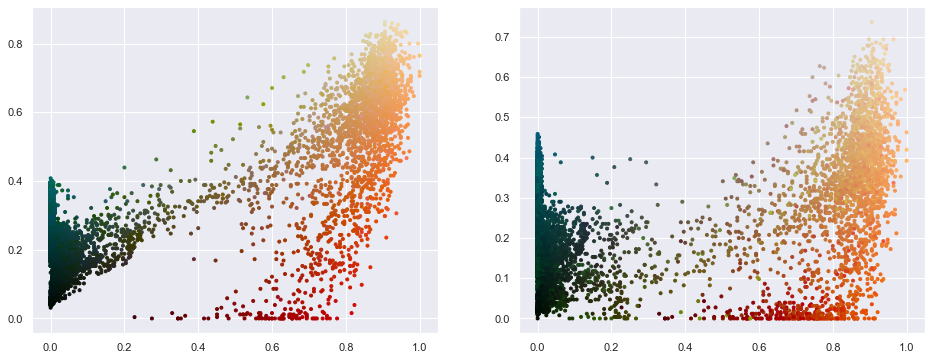

In [25]:
plot_pixels(data,title='dfd')

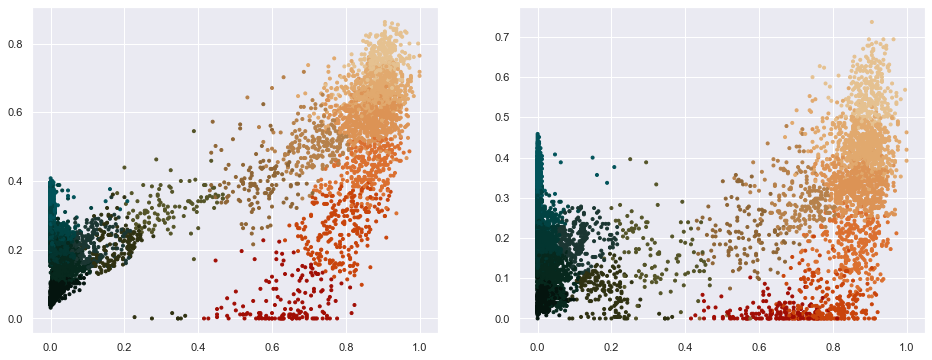

In [26]:
import warnings;warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors=new_colors,title='gfff')

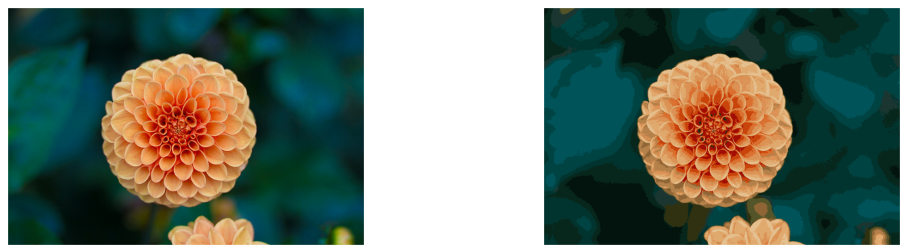

In [27]:
china_recolored=new_colors.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.5)
ax[0].imshow(china)
ax[1].imshow(china_recolored)